<a href="https://colab.research.google.com/github/D-Bavanapriya/Sentimental-Analysis-on-Restaurant_Reviews-dataset/blob/main/gui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load dependencies
from google.colab import files
uploaded = files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Load dataset
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [ ]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [ ]:
df.shape

(1000, 2)

In [ ]:
#Clean data
#to remove html tag
import re
def clean(x):
    x = re.sub(r'<.*?>',' ',x)
    x= re.sub(r"can't",'can not',x)
    x= re.sub(r"don't",'do not',x)
    x= re.sub(r"didn't",'did not',x)
    #change to mobile number
    x= re.sub(r'[\d-]{10,12}','mobno',x)
    #to remove punctuatin and numbers
    x = re.sub(r'[^A-Za-z]',' ',x)
    #to replace more than 1 space with 1 space
    x = re.sub(r'\s+',' ',x)
    #to convert into lower
    return x.lower()

clean("<h1>Hello there 9876576767 8787878787 I can't 9 eat this &^%H@#$%</h1>")

' hello there mobno mobno i can not eat this h '

In [ ]:
df['Review'] = df.Review.apply(clean)

In [ ]:
df.head(10)

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
5,now i am getting angry and i want my damn pho,0
6,honeslty it did not taste that fresh,0
7,the potatoes were like rubber and you could te...,0
8,the fries were great too,1
9,a great touch,1


In [ ]:
#Split data
from sklearn.model_selection import train_test_split
df.Liked.value_counts()
print(df.shape)

(1000, 2)


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df['Review'].values,df['Liked'].values,test_size=.20, random_state=10)
xtrain

array(['what i really like there is the crepe station ',
       'i m not really sure how joey s was voted best hot dog in the valley by readers of phoenix magazine ',
       'i loved the bacon wrapped dates ', 'boy was that sucker dry ',
       'strike who wants to be rushed ',
       'like the other reviewer said you couldn t pay me to eat at this place again ',
       'my breakfast was perpared great with a beautiful presentation of giant slices of toast lightly dusted with powdered sugar ',
       'terrible service ', 'but i do not like it ',
       'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced ',
       'tasted like dirt ', 'it wasn t busy at all and now we know why ',
       'i can not tell you how disappointed i was ',
       'also i feel like the chips are bought not made in house ',
       'the food was terrible ', 'it was packed ', 'i m not eating here ',
       'there was hardly any meat ',
       'if it were possible to g

In [ ]:
print(xtrain.shape, xtest.shape, )

(800,) (200,)


In [ ]:
#Count vectorizer              #tokenization text->numeric
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(xtrain)

CountVectorizer()

In [ ]:
cv.get_feature_names_out()
print(len(cv.get_feature_names_out(xtest)))

1763


In [ ]:
cv_train = cv.transform(xtrain).toarray()
cv_test = cv.transform(xtest)

In [ ]:
cv_train.shape

(800, 1763)

In [ ]:
print(cv_train.shape)
print(cv_test.shape)

(800, 1763)
(200, 1763)


In [ ]:
cv_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#Train Model
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
nb = MultinomialNB(alpha=1)
lg = LogisticRegression()

In [ ]:
nb.fit(cv_train,ytrain)

MultinomialNB(alpha=1)

In [ ]:
lg.fit(cv_train,ytrain)

LogisticRegression()

In [ ]:
#Prediction
lg_pred = lg.predict(cv_test)
nb_pred = nb.predict(cv_test)

In [ ]:
#Evaluation
from sklearn.metrics import (recall_score,accuracy_score,
                             precision_score, confusion_matrix)

In [ ]:
print("Logistic Regression")
print("Training Score: ",lg.score(cv_train,ytrain))
print("Testing Score: ",lg.score(cv_test,ytest))
print()
print("Confusion Matrix")      #info about every class
print(confusion_matrix(ytest,lg_pred))
print(precision_score(ytest, lg_pred))
print(recall_score(ytest, lg_pred))
print(accuracy_score(ytest, lg_pred))

Logistic Regression
Training Score:  0.98625
Testing Score:  0.825

Confusion Matrix
[[83 17]
 [18 82]]
0.8282828282828283
0.82
0.825


In [ ]:
print("Naive Bayes")
print("Training Score: ",nb.score(cv_train,ytrain))
print("Testing Score: ",nb.score(cv_test,ytest))
print("Confusion Matrix")
print(confusion_matrix(ytest,nb_pred))
accuracy_score(ytest,nb_pred)

Naive Bayes
Training Score:  0.95625
Testing Score:  0.795
Confusion Matrix
[[85 15]
 [26 74]]


0.795

In [ ]:
#Find best value of alpha
from sklearn.model_selection import GridSearchCV,KFold   #KFold-how many times to iterate

In [ ]:
p = {'alpha':[100,10,1,.1,.01,.001,.0001]}
kf = KFold(5,shuffle=True)

In [ ]:
gd = GridSearchCV(MultinomialNB(),param_grid=p,cv=kf,scoring='accuracy')
gd.fit(cv_train,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [ ]:
gd.best_params_

{'alpha': 1}

<ipython-input-31-f08da0f68e5b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((ytest-nb_pred))


<Axes: ylabel='Density'>

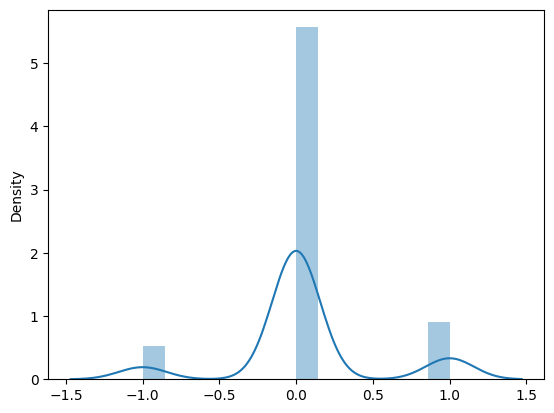

In [ ]:
#Visualization
import seaborn as sb
#warnings.filterwarnings("ignore")
sb.distplot((ytest-nb_pred))

In [ ]:
#Checking for some random samples
r = np.array(["Worst Experience ever","I must say it fabulus","Horrible! Don't ever visit again",
             "I hate this","I love this food","amazing food"])
cvr = cv.transform(r)

In [ ]:
print(cvr.shape)

(6, 1763)


In [ ]:
naive=nb.predict(cvr)

In [ ]:
logistic=lg.predict(cvr)

In [ ]:
mydf = pd.DataFrame({"Comment":r,"Naive Prediction":naive,"Logistic's Prediction":logistic})
mydf

,Comment,Naive Prediction,Logistic's Prediction
0,Worst Experience ever,0,0
1,I must say it fabulus,0,1
2,Horrible! Don't ever visit again,0,0
3,I hate this,0,0
4,I love this food,1,1
5,amazing food,1,1


In [ ]:
import pickle

In [ ]:
filename="review_model_log.pkl"
file= open(filename,"wb")
pickle.dump(lg,file)
file.close()

In [ ]:
fl = open("review_model_log.pkl","rb")
c = pickle.load(fl)
c

LogisticRegression()

In [ ]:
countvector = "review_cv.pkl"
cfile = open(countvector,"wb")
pickle.dump(cv,cfile)
file.close()

In [ ]:
cfl = open("review_cv.pkl","rb")
cv=pickle.load(cfl)
cv

CountVectorizer()

In [ ]:
#creation of GUI
!pip install gradio
import gradio as gr
import joblib
model = joblib.load('review_model_log.pkl')
vectorizer = joblib.load('review_cv.pkl')
def predict_sentiment(review):
    processed_input = vectorizer.transform([review])
    prediction = model.predict(processed_input)[0]
    label = {0: "Customer is not satisfied 😞", 1: "Customer is satisfied 😊"}
    return label[prediction]

# Create the Gradio interface
gr.Interface(fn=predict_sentiment,
             inputs="text",
             outputs="text",
             title="Restaurant Review Sentiment Analysis").launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public 